### Books  Recommender System

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
books=pd.read_csv('C:\\Users\\bahar.inan\\Documents\\ISTDSA_Bahar_Projeler\\proje5\\BX-Books.csv',sep=';',on_bad_lines='skip', encoding='latin-1',low_memory=False)

In [218]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [219]:
books.shape

(271360, 8)

In [220]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [221]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [223]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

In [224]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [225]:
books.rename(columns= {
    "Book-Title":"title",
    "Book-Author":"author",
    "Year-Of-Publication":"year",
    "Publisher":"publisher",
    "Image-URL-L":"img_url"} , inplace=True)

In [226]:
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [227]:
book_count_author=books.author.value_counts()
book_count_author

author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson             1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Jean Cassels              1
Christopher  Biffle       1
Name: count, Length: 102022, dtype: int64

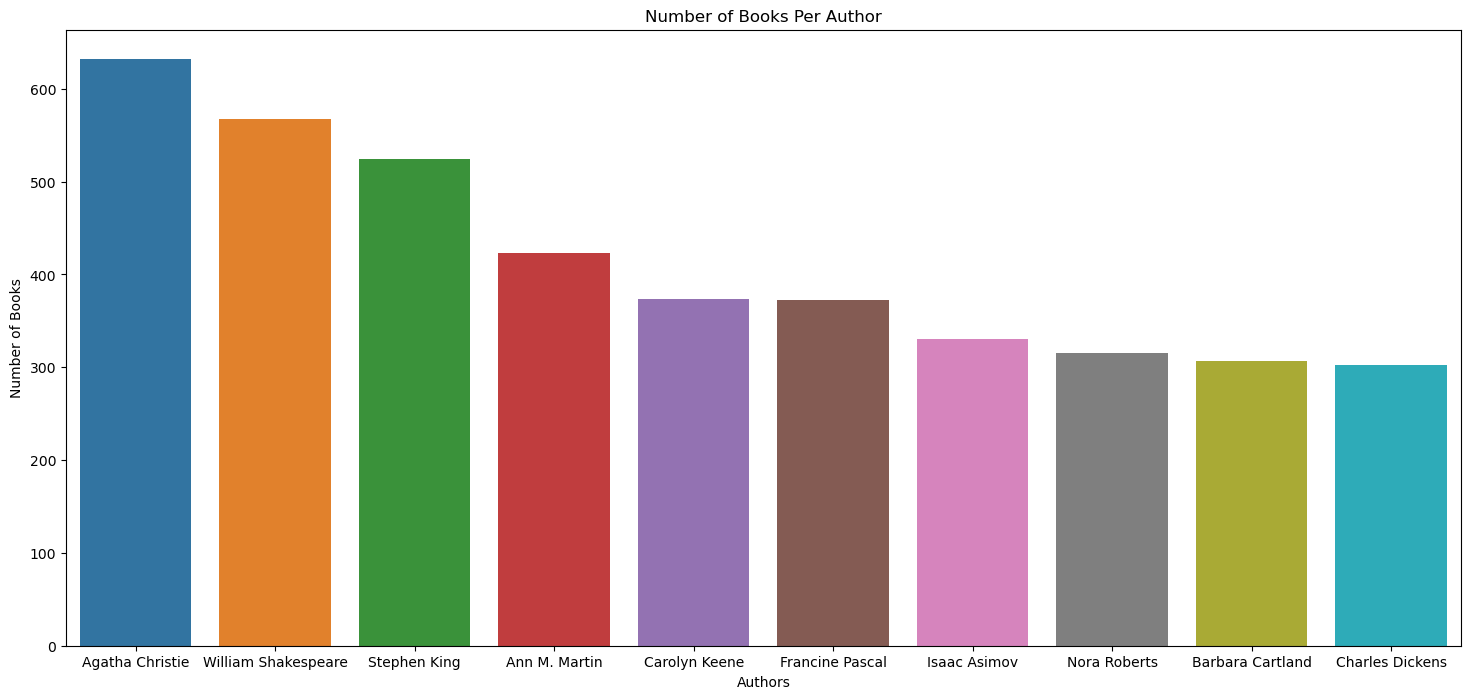

In [229]:
#en fazla kitabı olan yazarlar
plt.figure(figsize=[18,8])
sns.barplot(x=book_count_author[:10].index, y=book_count_author[:10])
plt.title("Number of Books Per Author")
plt.xlabel("Authors")
plt.ylabel("Number of Books");

In [230]:
users=pd.read_csv('C:\\Users\\bahar.inan\\Documents\\ISTDSA_Bahar_Projeler\\proje5\\BX-Users.csv',sep=';',on_bad_lines='skip', encoding='latin-1')

In [231]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [232]:
users.shape

(278858, 3)

In [233]:
users[users.duplicated()]

,User-ID,Location,Age


In [234]:
ratings=pd.read_csv('C:\\Users\\bahar.inan\\Documents\\ISTDSA_Bahar_Projeler\\proje5\\BX-Book-Ratings.csv',sep=';',on_bad_lines='skip', encoding='latin-1')

In [235]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [236]:
ratings.shape

(1149780, 3)

In [237]:
ratings.rename(columns= {
    "User-ID":"user_id",
    "Book-Rating":"rating"
} , inplace=True)

In [238]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [239]:
ratings['user_id'].value_counts()    #müşterilerin yorum sayıları

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [240]:
ratings['user_id'].unique().shape #tekil müşteri adedi bu kadar müşteriye ihtiyacımız yok

(105283,)

In [241]:
x = ratings['user_id'].value_counts() > 200

In [25]:
x[x].shape

(899,)

In [26]:
y = x[x].index  #200 den fazla yorumu olan müşterilerin user_id leri

In [27]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [242]:
ratings = ratings[ratings['user_id'].isin(y)]

In [243]:
ratings.shape

(526356, 3)

In [244]:
ratings_with_books=ratings.merge(books, on="ISBN")

In [245]:
ratings_with_books

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...


In [246]:
count_of_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [247]:
count_of_rating.head()   #50' den fazla yorum yapılan kitapları seçecğiz, burda adetleri hesapladık.

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [248]:
count_of_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [249]:
count_of_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [250]:
final_rating = ratings_with_books.merge(count_of_rating, on='title')

In [37]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,http://images.amazon.com/images/P/1892145022.0...,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,1
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,1


In [251]:
final_rating = final_rating[final_rating['num_of_rating']>=50] #50' den fazla yorum yapılan kitapları seçiyoruz

In [252]:
final_rating.shape

(61853, 9)

In [253]:
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [254]:
final_rating.shape

(59850, 9)

In [255]:
final_rating.to_csv('final_rating.csv', index=False, compression="zstd")

In [43]:
#content based filtering

In [256]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import joblib

In [257]:
df = pd.read_csv('C:\\Users\\bahar.inan\\Documents\\ISTDSA_Bahar_Projeler\\proje5\\final_rating.csv', low_memory=False, compression="zstd")
df

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
...,...,...,...,...,...,...,...,...,...
59845,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
59846,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
59847,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
59848,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [258]:
#Combining Selected Columns into a Single 'Attributes' Column
df = df.fillna("")
common_columns = ['author', 'publisher', 'year']
all_columns = common_columns
df['Attributes'] = df[all_columns].astype(str).agg(' '.join, axis=1)
df

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating,Attributes
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
...,...,...,...,...,...,...,...,...,...,...
59845,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50,Iris Johansen Bantam 1998
59846,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50,Iris Johansen Bantam 1998
59847,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50,Iris Johansen Bantam 1998
59848,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50,Iris Johansen Bantam 1998


In [259]:
#Removing Duplicate Rows based on the 'Attributes' and 'title' Columns
df.drop_duplicates(subset=['Attributes'], inplace=True)
df.drop_duplicates(subset=['title'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating,Attributes
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82,James Finn Garner John Wiley &amp; Sons Inc 1994
1,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133,Barbara Kingsolver Perennial 1999
2,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108,Ann Patchett Perennial 2002
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108,Janet Evanovich HarperTorch 1995
4,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79,Frances Hodgson Burnett HarperTrophy 1998
...,...,...,...,...,...,...,...,...,...,...
701,13273,0770427758,0,Drums of Autumn,Diana Gabaldon,1997,Seal Press (WA),http://images.amazon.com/images/P/0770427758.0...,53,Diana Gabaldon Seal Press (WA) 1997
702,25981,0399149848,5,Birthright,Nora Roberts,2003,Putnam Publishing Group,http://images.amazon.com/images/P/0399149848.0...,52,Nora Roberts Putnam Publishing Group 2003
703,15408,0671867156,0,Pretend You Don't See Her,Mary Higgins Clark,1998,Pocket,http://images.amazon.com/images/P/0671867156.0...,105,Mary Higgins Clark Pocket 1998
704,16634,0553287397,0,Dark Angel,Sally Beauman,1991,Bantam Books,http://images.amazon.com/images/P/0553287397.0...,54,Sally Beauman Bantam Books 1991


In [260]:
#tf-idf matrix

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Attributes'])
tfidf_matrix.shape

(706, 718)

In [261]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [274]:
def get_recommendations(book):
    idx = df.index[df['title'] == book].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[book_indices].to_list()

In [275]:
get_recommendations('1984')

['Animal Farm',
 'Four Past Midnight',
 'Wizard and Glass (The Dark Tower, Book 4)',
 'Insomnia',
 'The Door to December']

In [52]:
joblib.dump((cosine_sim, df), 'content_based_recommender_model.pkl')

['content_based_recommender_model.pkl']

In [53]:
## Collaborative filtering

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import joblib
from IPython.display import HTML

In [55]:
book_pivot = final_rating.pivot_table(columns='user_id',index='title', values='rating')

In [56]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [57]:
book_pivot.fillna(0, inplace=True) #0 ile doldurduk ancak mesafe algosu olduğu için sıfırı hesaplamayacağız

In [58]:
from scipy.sparse import csr_matrix

In [59]:
book_sparse = csr_matrix(book_pivot)

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(book_sparse)
cosine_sim

array([[1.        , 0.07624004, 0.        , ..., 0.09387814, 0.04480685,
        0.03286937],
       [0.07624004, 1.        , 0.27421749, ..., 0.07424784, 0.16365457,
        0.15050832],
       [0.        , 0.27421749, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.09387814, 0.07424784, 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04480685, 0.16365457, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03286937, 0.15050832, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [61]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book_pivot.index, columns=book_pivot.index)
cosine_sim_df.head()

title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
title,,,,,,,,,,,,,,,,,,,,,
1984,1.00000,0.076240,0.000000,0.0,0.073110,0.035923,0.000000,0.072044,0.098449,0.000000,...,0.031192,0.000000,0.000000,0.091742,0.052039,0.051312,0.000000,0.093878,0.044807,0.032869
1st to Die: A Novel,0.07624,1.000000,0.274217,0.0,0.038547,0.097921,0.101576,0.107441,0.126910,0.146879,...,0.058080,0.166013,0.164768,0.081162,0.035336,0.059973,0.186066,0.074248,0.163655,0.150508
2nd Chance,0.00000,0.274217,1.000000,0.0,0.035664,0.062481,0.109143,0.000000,0.059932,0.158016,...,0.135634,0.185249,0.040925,0.144283,0.000000,0.065279,0.168962,0.047329,0.051956,0.111790
4 Blondes,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.111582,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.011545,0.106899,0.104893,0.076242,0.000000,0.000000,0.000000
84 Charing Cross Road,0.07311,0.038547,0.035664,0.0,1.000000,0.028662,0.124993,0.037872,0.000000,0.000000,...,0.033184,0.056728,0.052566,0.055115,0.000000,0.000000,0.049138,0.048634,0.066735,0.108052


In [129]:
books_url=final_rating.loc[:,['title','img_url']].drop_duplicates()
books_url

,title,img_url
0,Politically Correct Bedtime Stories: Modern Ta...,http://images.amazon.com/images/P/002542730X.0...
242,The Poisonwood Bible: A Novel,http://images.amazon.com/images/P/0060930535.0...
388,Bel Canto: A Novel,http://images.amazon.com/images/P/0060934417.0...
502,One for the Money (Stephanie Plum Novels (Pape...,http://images.amazon.com/images/P/0061009059.0...
679,The Secret Garden,http://images.amazon.com/images/P/006440188X.0...
...,...,...
228870,Still Waters,http://images.amazon.com/images/P/0743439651.0...
228881,Still Waters,http://images.amazon.com/images/P/0061090956.0...
228883,Still Waters,http://images.amazon.com/images/P/074350996X.0...
228885,Still Waters,http://images.amazon.com/images/P/0613224450.0...


In [204]:
def find_similar_books(book, count=1):
    """
    Parameters
    ----------
    beers: list
        some beer names!
        
    count: int (default=1)
        count of similar beer!
    
    Returns
    -------
    ranked_beers: list
        rank ordered beers
    """
   
    books_summed = cosine_sim_df[book]
    books_summed = books_summed.sort_values(ascending=False) # Yüksek skorlar daha iyi
    ranked_books = books_summed.index[books_summed.index.isin(books)==False]
    ranked_books = ranked_books.tolist()

   
    if count is None:
        return ranked_books
    else:
        return ranked_books[:count]


In [212]:
suggest_books=find_similar_books("1984", 5)

In [213]:
suggest_books

['1984',
 'Animal Farm',
 "The Handmaid's Tale",
 'The Catcher in the Rye',
 'Lord of the Flies']

In [214]:
book_url=[]
for book in suggest_books:
    book_url.append(books_url[books_url.title==book]['img_url'].tolist()[1])

['http://images.amazon.com/images/P/0451519841.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0451524667.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0449911535.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/0316769177.01.LZZZZZZZ.jpg',
 'http://images.amazon.com/images/P/1573226122.01.LZZZZZZZ.jpg']

In [65]:
books_name = book_pivot.index

In [66]:
books_name

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [67]:
import pickle

In [68]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))
pickle.dump(books_name,open('books_name.pkl','wb'))
pickle.dump(final_rating,open('final_rating.pkl','wb'))
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))
pickle.dump(cosine_sim_df,open('cosine_sim_df.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))